In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                  Model  Accuracy   ROC-AUC
0  Decision Tree (Base)  0.875912  0.858031
1              AdaBoost  0.919708  0.988651


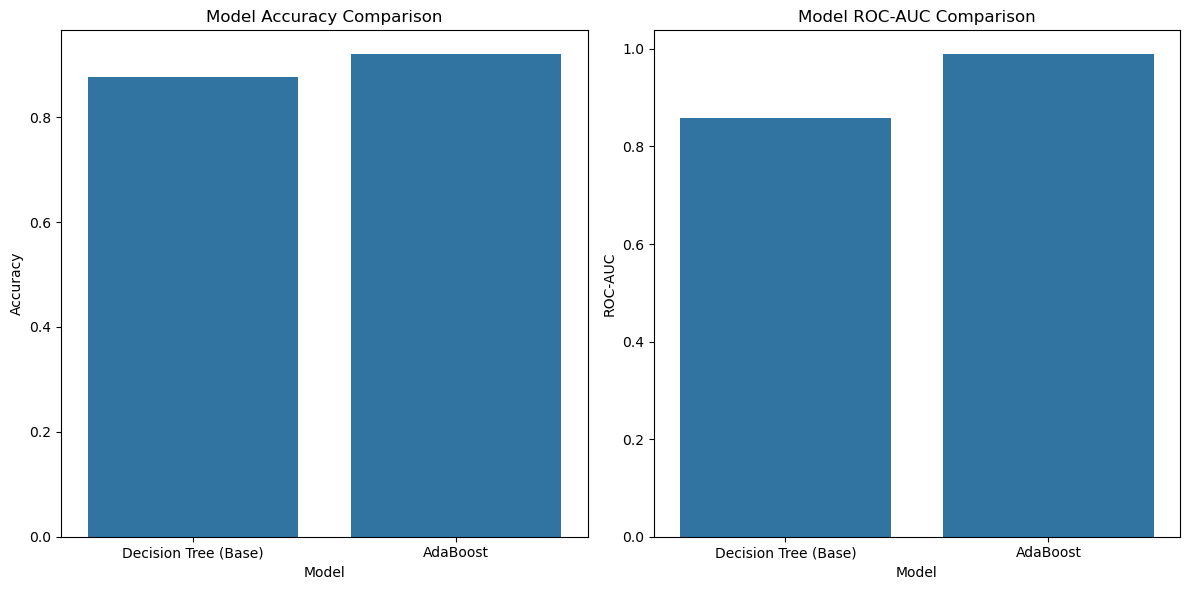


AdaBoost's improvement over the base model can be seen in both the Accuracy and ROC-AUC scores.
AdaBoost works by combining weak learners (like the Decision Tree with max_depth=1), and improving their performance.


In [5]:
data = pd.read_csv('D:/breast-cancer-wisconsin.csv')
data['barenuclei'] = pd.to_numeric(data['barenuclei'], errors='coerce')
data = data.dropna() 
data.rename(columns={'benormal': 'class'}, inplace=True)

X = data.drop(columns=['class'])
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)

adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

base_pred = base_model.predict(X_test)
adaboost_pred = adaboost_model.predict(X_test)

base_accuracy = accuracy_score(y_test, base_pred)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)

base_roc_auc = roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1])
adaboost_roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

performance = pd.DataFrame({
    'Model': ['Decision Tree (Base)', 'AdaBoost'],
    'Accuracy': [base_accuracy, adaboost_accuracy],
    'ROC-AUC': [base_roc_auc, adaboost_roc_auc]
})

print(performance)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Model', y='Accuracy', data=performance, ax=ax[0])
ax[0].set_title('Model Accuracy Comparison')

sns.barplot(x='Model', y='ROC-AUC', data=performance, ax=ax[1])
ax[1].set_title('Model ROC-AUC Comparison')

plt.tight_layout()
plt.show()
print("\nAdaBoost's improvement over the base model can be seen in both the Accuracy and ROC-AUC scores.")
print("AdaBoost works by combining weak learners (like the Decision Tree with max_depth=1), and improving their performance.")
